# **Speech-to-Text Project**

In [ ]:
#Import necessary libraries
!pip install --upgrade google-cloud-speech
import os
import pprint

from google.cloud import storage
from google.cloud import speech
from google.cloud import language_v1
from google.cloud import firestore


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Load Service Account

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "sa.json"

In [ ]:
def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""

    storage_client = storage.Client()

    blobs = storage_client.list_blobs(bucket_name)
    return blobs

In [ ]:
def extract_audio_gcs(gcs_uri):
    """Asynchronously transcribes the audio file specified by the gcs_uri."""

    client = speech.SpeechClient()

    audio = speech.RecognitionAudio(uri=gcs_uri)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        audio_channel_count=2,
        language_code="en-US",
    )

    operation = client.long_running_recognize(config=config, audio=audio)

    print("Waiting for operation to complete...")
    response = operation.result(timeout=90)

    return response

In [ ]:
def analyze_sentiment(text):
    client = language_v1.LanguageServiceClient()
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    return sentiment.score, sentiment.magnitude

In [ ]:
bucket_name = "admn5015-w25-mahilar"
blobs = list_blobs(bucket_name)

for blob in blobs:
    print(blob.name)

    # Create audio file URI
    gcs_uri = "gs://" + bucket_name + "/" + blob.name
    print("\nThis is the uri: {}".format(gcs_uri))

    # Extract text from audio file
    response = extract_audio_gcs(gcs_uri=gcs_uri)
    pprint.pprint(response)

    # Access each response element
    print("Accessing each element:")

    data = []

    if response.results:
      for i, result in enumerate(response.results):

    # Analyze sentiment for each transcribed sentence
        sentence_text = result.alternatives[0].transcript
        sentiment_score, sentiment_magnitude = analyze_sentiment(sentence_text)


        data.append({
            'wav_filename': blob.name,
            'sentence_text': sentence_text,
            'transcription_date': "2025-01-28"
        })


    pprint.pprint(data)


Technical Support (Software Update) Sample Scenario.wav

This is the uri: gs://admn5015-w25-mahilar/Technical Support (Software Update) Sample Scenario.wav
Waiting for operation to complete...
results {
  alternatives {
    transcript: "you\'re welcome have a nice day"
    confidence: 0.956438839
  }
  result_end_time {
    seconds: 2
    nanos: 340000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " thank you for calling the case stating my name is Miranda may you have your complete name"
    confidence: 0.866171896
  }
  result_end_time {
    seconds: 11
    nanos: 960000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transcript: " Laura Perez can you spell that for me it\'s l a u r a b e r e z a n k it\'s a Laura underscore fair is at gmail.com and my birthday is January 6th 1987"
    confidence: 0.895157397
  }
  result_end_time {
    seconds: 34
    nanos: 110000000
  }
  language_code: "en-us"
}
results {
  alternatives {
    transc

In [ ]:
# Initialize the Firestore client
db = firestore.Client()

In [ ]:
collection_ref = db.collection('speech_data')
docs=collection_ref.stream()
for doc in docs:
  print(doc.to_dict())

{'sentiment': 0.0, 'transcription_date': '2025-01-28', 'wav_filename': 'Technical Support (Software Update) Sample Scenario.wav', 'sentence_number': 3, 'magnitude': 0.0, 'sentence_text': " Laura Perez can you spell that for me it's l a u r a b e r e z a n k it's a Laura underscore fair is at gmail.com and my birthday is January 6th 1987"}
{'sentiment': -0.6000000238418579, 'transcription_date': '2025-01-28', 'wav_filename': 'Technical Support (Software Update) Sample Scenario.wav', 'sentence_number': 8, 'magnitude': 0.6000000238418579, 'sentence_text': ' I had to finish updating a second time'}
{'sentiment': -0.699999988079071, 'transcription_date': '2025-01-28', 'wav_filename': 'Technical Support (Software Update) Sample Scenario.wav', 'sentence_number': 6, 'magnitude': 0.699999988079071, 'sentence_text': " I think I don't worry Laura I will help you resolve it so you cannot complete your booking even if you all ready refresh the page the old to have a strong internet connection and y

In [ ]:
df = pd.DataFrame(data)
print(df)


                                         wav_filename  sentence_number  \
0   Technical Support (Software Update) Sample Sce...                1   
1   Technical Support (Software Update) Sample Sce...                2   
2   Technical Support (Software Update) Sample Sce...                3   
3   Technical Support (Software Update) Sample Sce...                4   
4   Technical Support (Software Update) Sample Sce...                5   
5   Technical Support (Software Update) Sample Sce...                6   
6   Technical Support (Software Update) Sample Sce...                7   
7   Technical Support (Software Update) Sample Sce...                8   
8   Technical Support (Software Update) Sample Sce...                9   
9   Technical Support (Software Update) Sample Sce...               10   
10  Technical Support (Software Update) Sample Sce...               11   
11  Technical Support (Software Update) Sample Sce...               12   

                                     

# **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

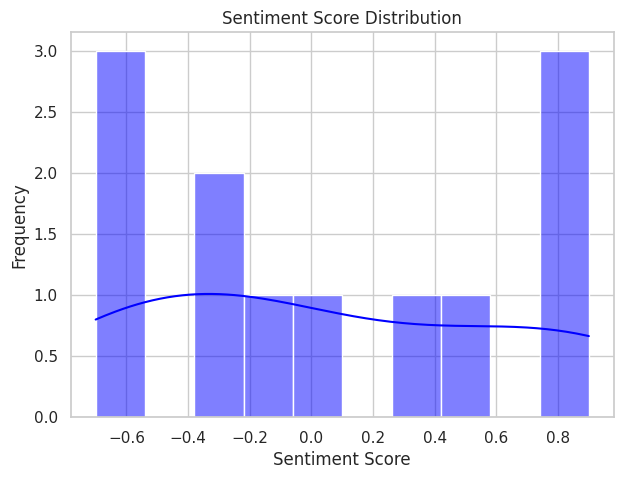

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

# Creating the visualizations
figsize=(14, 10)

# Sentiment Distribution
plt.figure(figsize=(7, 5))
sns.histplot(df["sentiment"], bins=10, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


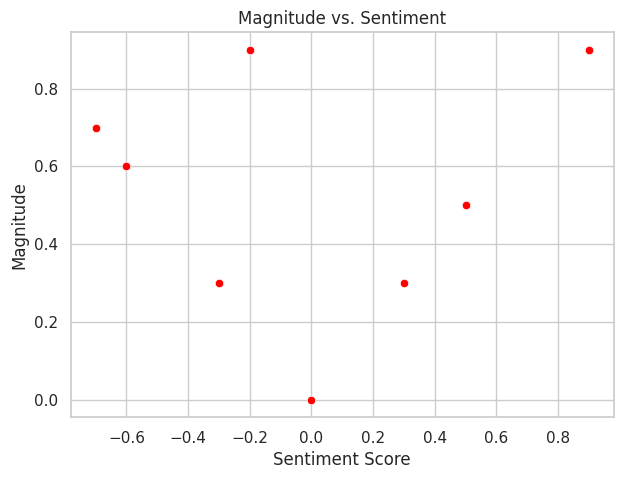

In [ ]:
# Magnitude vs. Sentiment Scatter Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["sentiment"], y=df["magnitude"], color="red")
plt.title("Magnitude vs. Sentiment")
plt.xlabel("Sentiment Score")
plt.ylabel("Magnitude")
plt.show()

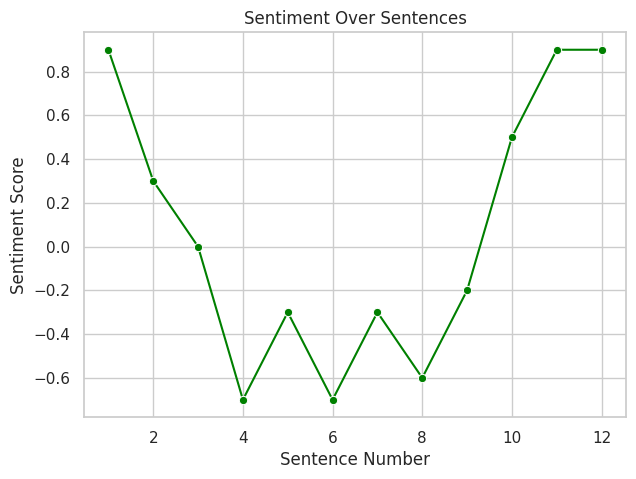

In [ ]:
# Sentiment Over Time (Sentence Number)
plt.figure(figsize=(7, 5))
sns.lineplot(x=df["sentence_number"], y=df["sentiment"], marker="o", color="green")
plt.title("Sentiment Over Sentences")
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score")
plt.show()

**Interpretation**

Sentiment Distribution: The conversation has both strong positive (0.9) and negative (-0.7) emotions, indicating a mix of satisfaction and frustration.


Magnitude vs. Sentiment: Higher sentiment values (both positive and negative) have stronger emotional intensity, showing that certain parts of the conversation were highly expressive.

Sentiment Over Sentences: The conversation fluctuates between positive and negative tones, suggesting moments of customer frustration followed by resolution.


Sentiment Category Distribution: Positive sentiment dominates, indicating an overall satisfactory experience, but negative moments highlight areas for improvement in customer interaction.
